# WISE Young Stellar Object Variability Analysis
WISE 관측 데이터를 이용한 원시성의 밝기변화 시계열 데이터 분석 프로젝트입니다.  

## 2. 밝기변화의 특성값 정의 및 생산, 밝기변화 형태 정의 및 분류
프로젝트의 두번째 단계로, 가공된 관측 데이터를 통해 밝기변화 특성값(feature)를 생성합니다.  
또한 밝기변화 형태와 그 기준을 정의하고 정해진 기준에 맞게 원시성을 분류합니다.

by Wooseok Park  
ref: https://ui.adsabs.harvard.edu/abs/2021ApJ...920..132P/abstract

### 1. Standard Deviation over mean error
[Johnstone et al. (2018)](https://ui.adsabs.harvard.edu/abs/2018ApJ...854...31J/abstract)에 따르면, 별의 '무작위적' 밝기변화 정도 ($\Delta F_{stoch}$)는 밝기 데이터의 표준편차를 평균 밝기 오차로 나눈 값으로 나타낼 수 있습니다.
$$\Delta F_{stoch} = SD / E(F_{error})$$

예를 들어 별 A의 평균 측정된 밝기오차가 1Jy (Jy-Jansky는 별의 광도 flux의 단위입니다)이고 표준편차 0.5Jy를 가진다면 $SD/E(F_{error}) = 0.5 / 1 = 0.5$ 이지만  
별 B의 평균 측정된 밝기오차가 0.1Jy, 표준편차가 0.5Jy라면 $SD/E(F_{error}) = 0.5 / 0.1 = 5$ 입니다.   
별 A의 경우 밝기오차가 크기 때문에 같은 표준편차 값을 가져도 실제로 밝기가 그만큼 변하는지 장담하기 힘들지만, 별 B의 경우 밝기오차 대비 높은 표준편차 값을 가지고 있기 때문에 확실히 밝기변화가 큼을 알 수 있습니다.   
**따라서 $SD/E(F_{error})$는 신뢰할 수 있는 별의 무작위적 밝기변화 정도를 보여주는 지표입니다.**

[Johnstone et al. (2018)](https://ui.adsabs.harvard.edu/abs/2018ApJ...854...31J/abstract)은 flux 밝기 단위를 사용하고 있고 이는 Linear한 scale을 가지고 있습니다. 하지만 WISE 데이터의 측정값은 magnitude(등급)을 사용하고 있습니다.  
등급 체계는 1등급 차이 당 2.5배의 밝기 차이를 가지며 등급이 낮아질 수록 밝아집니다. 이러한 단위는 Log scale을 갖기 때문에 이후 선형 및 sine 곡선 피팅을 적용하기 위하여 현재 밝기 측정 등급을 linear scale을 가지는 flux 단위로 변환합니다.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[SD / mean error] is:  4.82


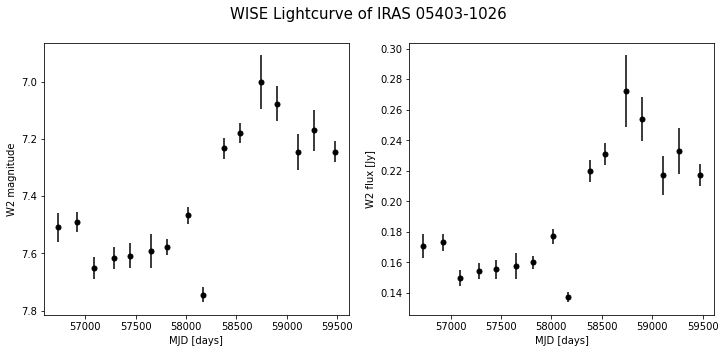

In [24]:
df = pd.read_csv('example_data/ex1_avg.csv')

fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].errorbar(df['mjd'], df['w2mag'], df['w2sigm'], fmt='k.',ms=10)
ax[0].invert_yaxis()
ax[0].set_xlabel('MJD [days]')
ax[0].set_ylabel('W2 magnitude')

# flux 변환
df['w2flux'] = df['w2mag'].apply(lambda x: 171.85 * 10 ** (-x / 2.5))
df['w2ferr'] = df['w2flux'] * df['w2sigm'] / 1.0857            #ferr2 = ew2f * fw2 / 1.0857

ax[1].errorbar(df['mjd'], df['w2flux'], df['w2ferr'], fmt='k.', ms=10)
ax[1].set_xlabel('MJD [days]')
ax[1].set_ylabel('W2 flux [Jy]')

plt.suptitle('WISE Lightcurve of IRAS 05403-1026', size=15)

print('[SD / mean error] is: {:5.2f}'.format(df['w2flux'].std()/df['w2ferr'].mean()))


오른쪽 그래프처럼 Flux 로 변환 후 계산결과 IRAS 05403-1026은 $SD/E(F_{error})$ 의 값으로 4.82를 가집니다.